In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
countries = [
    "Argentina",
    "Bolivia",
    "Chile",
    "Colombia",
    "Costa Rica",
    "Cuba",
    "Ecuador",
    "El Salvador",
    "Guatemala",
    "Honduras",
    "Mexico",
    "Nicaragua",
    "Panama",
    "Paraguay",
    "Peru",
    "Puerto Rico",
    "Dominican Republic",
    "Uruguay",
    "Venezuela",
    "Spain"
]
print(len(countries))  # 20

20


# V-dem
Dado que se toma una sola pregunta de el, se toma el valor en CPI

In [3]:
path = "./datasets/V-Dem-CY-Full+Others-v14.csv"
df = pd.read_csv(path, header=0)

/tmp/ipykernel_9903/3049051899.py:2: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, header=0)


In [4]:
df_vdem = df[(df['year']==2024) & (df['country_name'].isin(countries))]
df_vdem = df_vdem[['country_name', 'v2x_corr']]#, 'v2x_corr_codelow', 'v2x_corr_codehigh', 'v2x_corr_sd']]
df_vdem.rename(columns={'v2x_corr': 'vdem'}, inplace=True)
df_vdem.set_index('country_name', inplace=True)
df_vdem

,vdem
country_name,


# BTI

In [5]:
path = "./datasets/BTI_2024_Scores.csv"
df_bti = pd.read_csv(path, header=0, usecols=['Country', '  Q3.3 | Prosecution of office abuse', '  Q15.3 | Anti-corruption policy'])
df_bti.rename(columns={'Country': 'country', '  Q3.3 | Prosecution of office abuse': 'bti_3', '  Q15.3 | Anti-corruption policy': 'bti_15'}, inplace=True)
df_bti = df_bti[df_bti['country'].isin(countries)]
df_bti.set_index('country', inplace=True)
df_bti

,bti_3,bti_15
country,,
Argentina,8,70
Bolivia,8,37
Chile,10,8
Colombia,7,74
Costa Rica,9,10
Cuba,2,5
Dominican Republic,8,8
Ecuador,7,93
El Salvador,5,28


# WJP

In [6]:
df_wjp = pd.read_excel("./datasets/2024_wjp_rule_of_law_index_HISTORICAL_DATA_FILE.ods", header=0, sheet_name="WJP_ROL_Index_2024_Scores", engine="odf")
df_wjp.rename(columns={'Country': 'country'}, inplace=True)
df_wjp.set_index('country', inplace=True)
df_wjp = df_wjp.T
questions = ["2.1 Government officials in the executive branch do not use public office for private gain",
                                               "2.2 Government officials in the judicial branch do not use public office for private gain",
                                               "2.3 Government officials in the police and the military do not use public office for private gain",
                                               "2.4 Government officials in the legislative branch do not use public office for private gain"
            ]
df_wjp = df_wjp[df_wjp.index.isin(countries)][questions]

rename_map = {q: f"wjp_{i+1}" for i, q in enumerate(questions)}
df_wjp.rename(columns=rename_map, inplace=True)
df_wjp

country,wjp_1,wjp_2,wjp_3,wjp_4
Argentina,0.387976,0.653564,0.591817,0.198507
Bolivia,0.305759,0.158059,0.268814,0.179822
Chile,0.609473,0.820165,0.809936,0.514733
Colombia,0.378315,0.585682,0.515168,0.10025
Costa Rica,0.6186,0.762191,0.737043,0.412653
Dominican Republic,0.430053,0.509534,0.473446,0.212553
Ecuador,0.376852,0.371688,0.51729,0.193062
El Salvador,0.310729,0.502008,0.494326,0.082169
Guatemala,0.364479,0.408314,0.52072,0.084689
Honduras,0.344886,0.366355,0.463286,0.103375


# CPI

In [7]:
path = "./datasets/CPI2024-Results-and-trends.csv"
df_cpi = pd.read_csv(path, header=2, encoding="ISO-8859-1", sep=';')
#df = df[df["Country"].isin(countries)]

cpi2024_sources = {
    "rank": "Rank",
    "cpi": "CPI 2024 score",
    "bti": "Bertelsmann Foundation Transformation Index",
    "eiu": "Economist Intelligence Unit Country Ratings",
    "gi": "S&P / Global Insights Country Risk Ratings",
    "prs": "PRS International Country Risk Guide",
    "vdem": "Varieties of Democracy Project",
    "wef": "World Economic Forum EOS",
    "wjp": "World Justice Project Rule of Law Index"
}


df_cpi = df_cpi[["Country / Territory"] + list(cpi2024_sources.values())]

df_cpi.rename(columns=dict(zip(["Country / Territory"] + list(cpi2024_sources.values()), ["country"] + list(cpi2024_sources.keys()))), inplace=True)
df_cpi.set_index('country', inplace=True)
df_cpi = df_cpi.reindex(countries)
df_cpi.dropna(how='all', inplace=True)
df_cpi

,rank,cpi,bti,eiu,gi,prs,vdem,wef,wjp
country,,,,,,,,,
Argentina,99.0,37.0,51.0,51.0,32.0,33.0,48.0,18.0,44.0
Bolivia,133.0,28.0,39.0,35.0,32.0,33.0,34.0,6.0,18.0
Chile,32.0,63.0,82.0,67.0,59.0,60.0,70.0,58.0,64.0
Colombia,92.0,39.0,47.0,51.0,46.0,33.0,48.0,29.0,38.0
Costa Rica,42.0,58.0,73.0,67.0,59.0,42.0,62.0,43.0,60.0
Cuba,82.0,41.0,39.0,51.0,32.0,49.0,35.0,NaN,NaN
Ecuador,121.0,32.0,47.0,35.0,32.0,33.0,30.0,17.0,30.0
El Salvador,130.0,30.0,30.0,35.0,32.0,33.0,27.0,23.0,31.0
Guatemala,146.0,25.0,17.0,18.0,32.0,28.0,22.0,29.0,27.0


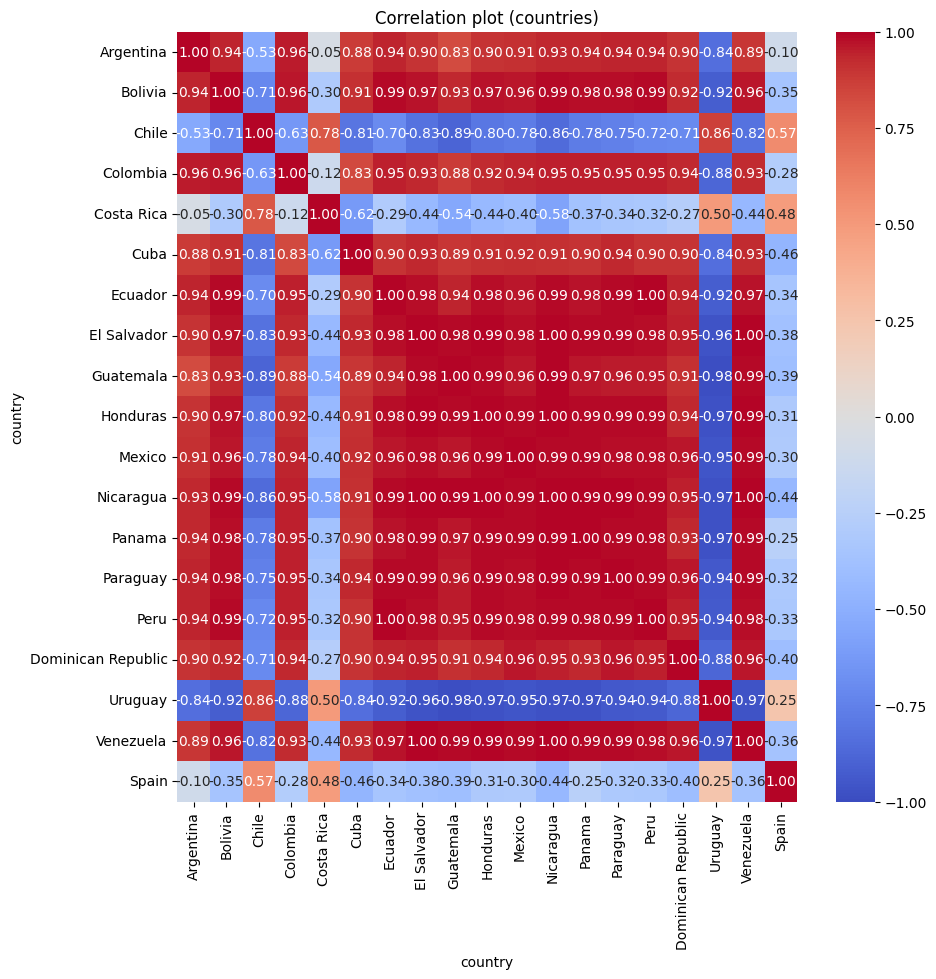

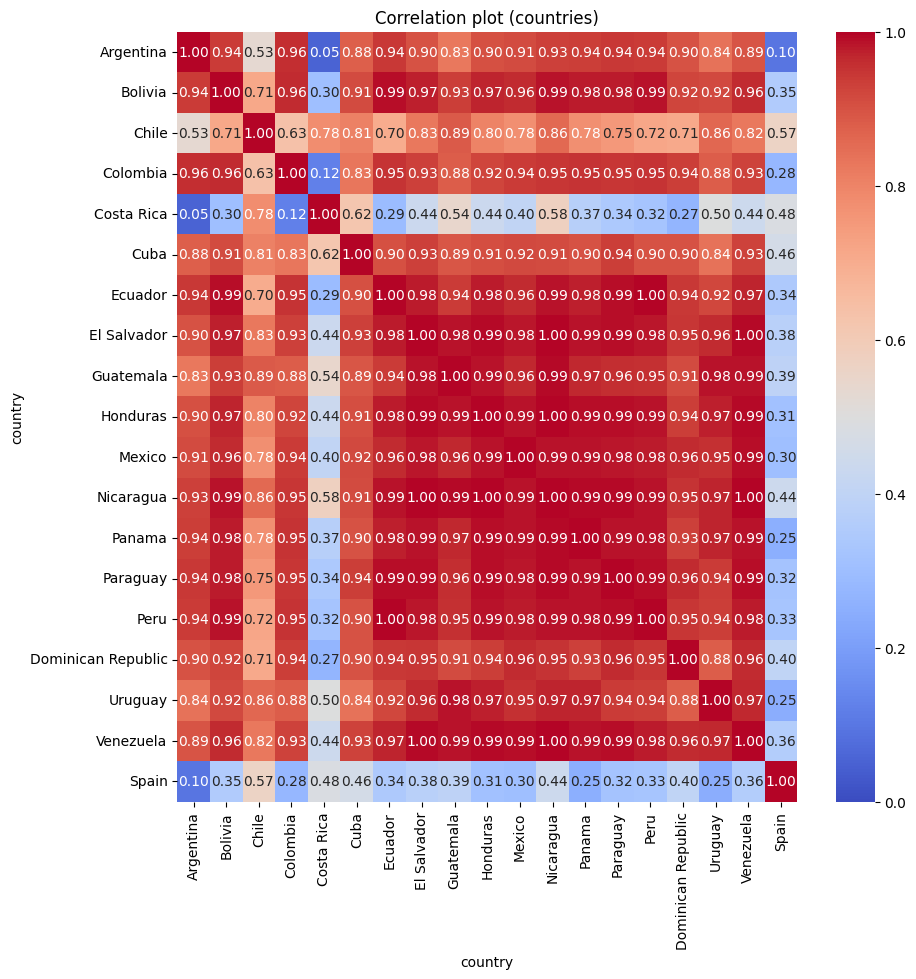

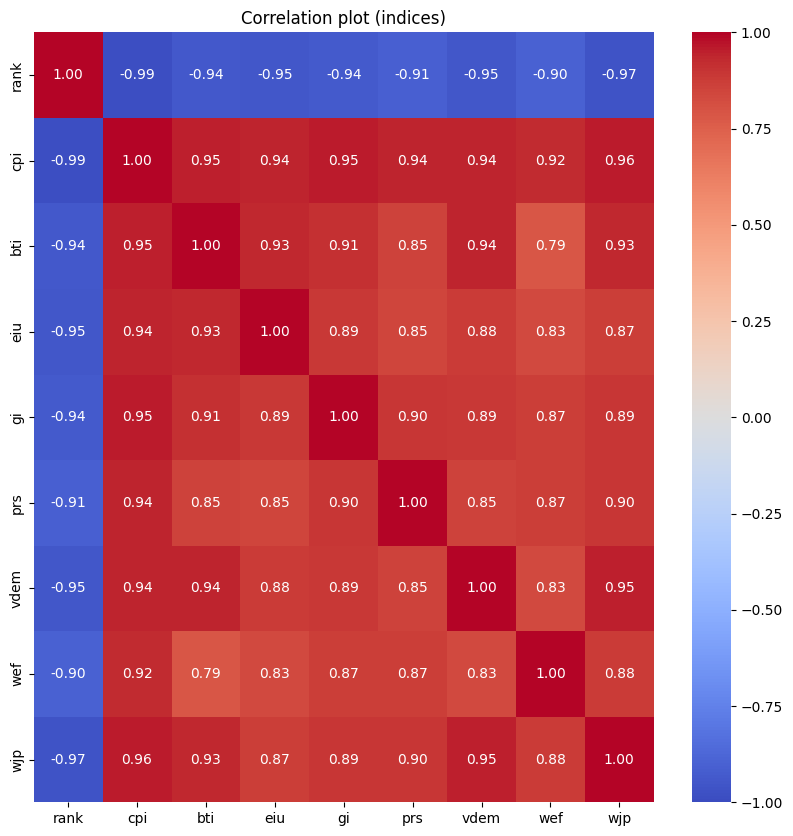

In [8]:
corr = df_cpi.T.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
#sns.heatmap(np.abs(corr), annot=True, cmap="coolwarm", vmin=0, vmax=1, fmt=".1f")
plt.title("Correlation plot (countries)")
plt.show()

plt.figure(figsize=(10,10))
#sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
sns.heatmap(np.abs(corr), annot=True, cmap="coolwarm", vmin=0, vmax=1, fmt=".2f")
plt.title("Correlation plot (countries)")
plt.show()

corrT = df_cpi.corr()

plt.figure(figsize=(10,10))
#sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
sns.heatmap(corrT, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation plot (indices)")
plt.show()

In [9]:
type(corr)

pandas.core.frame.DataFrame

# Dataset desglosado para paises considerados

In [12]:
df_desglosado = pd.concat([df_cpi[['cpi', 'rank']], df_bti, df_cpi[['eiu', 'gi', 'prs', 'vdem', 'wef']], df_wjp], axis=1)
df_desglosado.to_csv("./datasets/latam_desglosado_full.csv")
df_desglosado

,cpi,rank,bti_3,bti_15,eiu,gi,prs,vdem,wef,wjp_1,wjp_2,wjp_3,wjp_4
Argentina,37.0,99.0,8.0,70.0,51.0,32.0,33.0,48.0,18.0,0.387976,0.653564,0.591817,0.198507
Bolivia,28.0,133.0,8.0,37.0,35.0,32.0,33.0,34.0,6.0,0.305759,0.158059,0.268814,0.179822
Chile,63.0,32.0,10.0,8.0,67.0,59.0,60.0,70.0,58.0,0.609473,0.820165,0.809936,0.514733
Colombia,39.0,92.0,7.0,74.0,51.0,46.0,33.0,48.0,29.0,0.378315,0.585682,0.515168,0.10025
Costa Rica,58.0,42.0,9.0,10.0,67.0,59.0,42.0,62.0,43.0,0.6186,0.762191,0.737043,0.412653
Cuba,41.0,82.0,2.0,5.0,51.0,32.0,49.0,35.0,NaN,NaN,NaN,NaN,NaN
Ecuador,32.0,121.0,7.0,93.0,35.0,32.0,33.0,30.0,17.0,0.376852,0.371688,0.51729,0.193062
El Salvador,30.0,130.0,5.0,28.0,35.0,32.0,33.0,27.0,23.0,0.310729,0.502008,0.494326,0.082169
Guatemala,25.0,146.0,4.0,38.0,18.0,32.0,28.0,22.0,29.0,0.364479,0.408314,0.52072,0.084689
Honduras,22.0,154.0,4.0,47.0,18.0,19.0,24.0,24.0,14.0,0.344886,0.366355,0.463286,0.103375


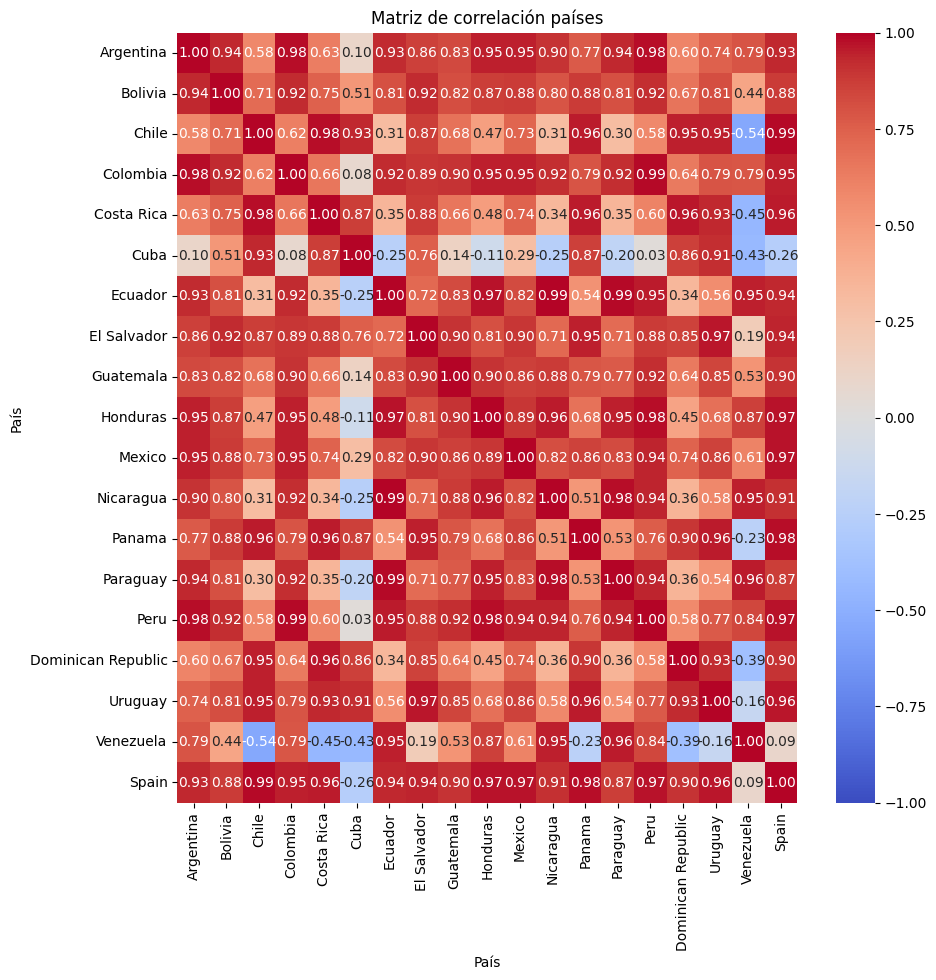

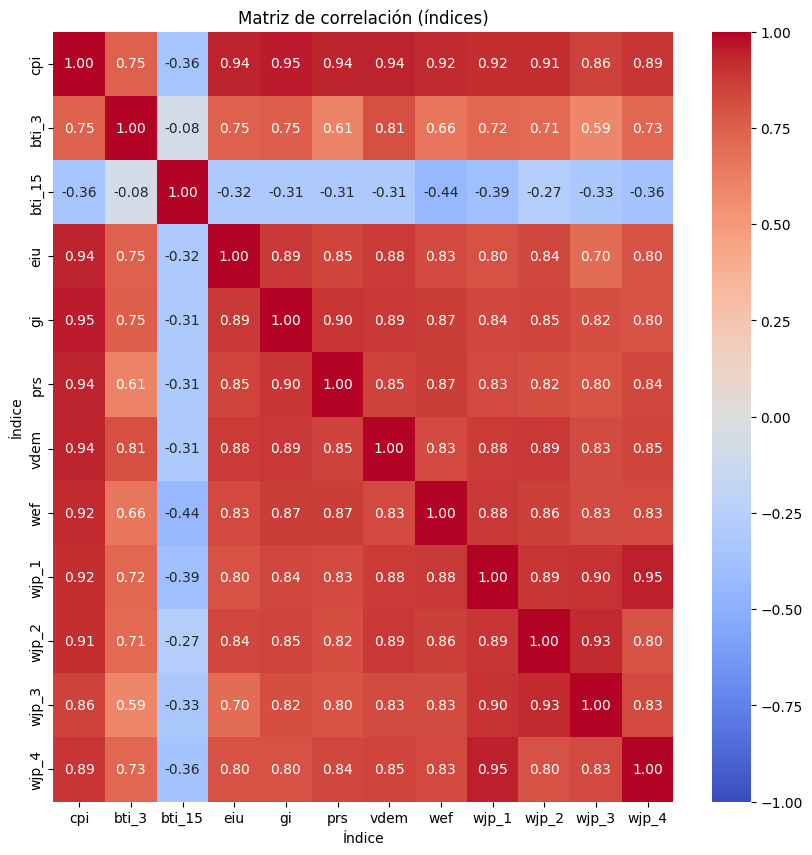

In [11]:
corr = df_desglosado.T.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
#sns.heatmap(np.abs(corr), annot=True, cmap="coolwarm", vmin=0, vmax=1, fmt=".1f")
plt.title("Matriz de correlación países")
plt.xlabel("País")
plt.ylabel("País")
plt.show()


corrT = df_desglosado.corr()

plt.figure(figsize=(10,10))
#sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
sns.heatmap(corrT, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Matriz de correlación (índices)")
plt.xlabel("Índice")
plt.ylabel("Índice")
plt.show()